In [1]:
!pip install -qq vaderSentiment

In [2]:
from pyspark.sql.functions import col

In [3]:
academic_dataset_parquet = spark.read \
.format("parquet") \
.option("header","true") \
.option("inferSchema","true") \
.load("file:///home/dps/Documents/yelp_dataset_parquet/academic_dataset_business")

24/11/23 22:58:11 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [4]:
academic_dataset_review_parquet = spark.read \
.format("parquet") \
.option("header","true") \
.option("inferSchema","true") \
.load("file:///home/dps/Documents/yelp_dataset_parquet/academic_dataset_review")

In [5]:
academic_dataset_user = spark.read \
.format("parquet") \
.option("header","true") \
.option("inferSchema","true") \
.load("file:///home/dps/Documents/yelp_dataset_parquet/academic_dataset_user")

In [6]:
academic_dataset_checkin = spark.read \
.format("parquet") \
.option("header","true") \
.option("inferSchema","true") \
.load("file:///home/dps/Documents/yelp_dataset_parquet/academic_dataset_checkin")

In [7]:
academic_dataset_tip = spark.read \
.format("parquet") \
.option("header","true") \
.option("inferSchema","true") \
.load("file:///home/dps/Documents/yelp_dataset_parquet/academic_dataset_tip")

In [8]:
academic_dataset_az = academic_dataset_parquet.filter("state = 'AZ' ")

In [9]:
academic_dataset_az.createOrReplaceTempView("academic_dataset_az")

In [10]:
selected_category = "Banks & Credit Unions, Financial Services"

In [11]:
academic_dataset_az = academic_dataset_az.filter(academic_dataset_az["categories"].contains(selected_category))

In [12]:
academic_dataset_business_reviews = academic_dataset_az.join(academic_dataset_review_parquet.alias("review"),academic_dataset_az.business_id == academic_dataset_review_parquet.business_id, "inner").select(
    col("review.user_id")
)

In [13]:
academic_dataset_user_selected_category = academic_dataset_business_reviews.alias("review").join(academic_dataset_user.alias("user"),academic_dataset_business_reviews.user_id == academic_dataset_user.user_id, "inner").select(
    col("review.user_id"),
    col("user.name"),
    col("user.cool"),
    col("user.funny"),
    col("user.useful"),
    col("user.review_count"),
    col("user.yelping_since"),
    col("user.elite"),
    col("user.friends"),
    col("user.fans"),
    col("user.average_stars"),
    col("user.compliment_cool"),
    col("user.compliment_cute"),
    col("user.compliment_funny"),
    col("user.compliment_hot"),
    col("user.compliment_note")  
)


In [14]:
academic_dataset_user_selected_category.createOrReplaceTempView("academic_dataset_user_selected_category")

In [15]:
spark.sql("select user_id, name, sum(review_count) as total_reviews from academic_dataset_user_selected_category group by user_id, name order by total_reviews desc limit 15").show(truncate = False)

+----------------------+--------+-------------+
|user_id               |name    |total_reviews|
+----------------------+--------+-------------+
|9Y1YkloHk2MAE3hkwYdFKA|Gene    |2536         |
|R7NM7vIyUfSTXvMsw7jNTA|Marshall|1680         |
|mJy-5ShuwwYRayxRtl6xxA|Lauren  |1628         |
|cjLp1QarHZb_SCf6xJmIWQ|Holly   |1270         |
|6ObFF8-uKnOAlXuSH4TlyQ|Isabella|1245         |
|lGpMQT0jgCLRNHBTSAL-IA|Stephen |996          |
|S5r0Rod3JrLSRBDDTLiCfg|John    |960          |
|KWLxxZKAcdUOBqBLMPW22w|Nancy   |944          |
|L2U4I05dvNsgCpm0NIxkJA|Zachary |892          |
|kA6H0FTukkmTXv5H3S9XCg|Monique |856          |
|0yrF14nWVAFeI0fG29a63g|Betsy   |851          |
|HB52HJAcW7zCcLRw2Oq8tw|James   |810          |
|xWmYN57XXZbg0LOK8WbbFQ|John    |794          |
|d6zIVWiJyPB6PZuAxVexwg|Robert  |787          |
|igll2PdsMvQHzJhzttrx1A|Jessica |713          |
+----------------------+--------+-------------+



In [83]:
simple1_df = spark.sql("select user_id, name, sum(review_count) as total_reviews from academic_dataset_user_selected_category group by user_id, name order by total_reviews desc limit 15").toPandas()

Text(0.5, 1.0, 'Top 15 Users by Total Reviews')

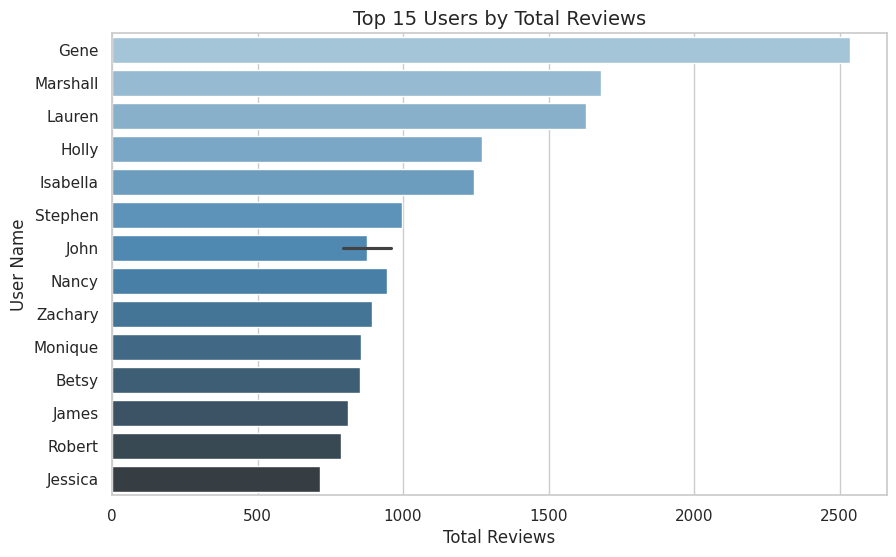

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='total_reviews', y='name', data=simple1_df, palette='Blues_d',hue = 'name')
plt.xlabel('Total Reviews', fontsize=12)
plt.ylabel('User Name', fontsize=12)
plt.title('Top 15 Users by Total Reviews', fontsize=14)

In [16]:
spark.sql("select substring(yelping_since from 1 for 4) as yelping_since_year, round(sum(average_stars)/count(average_stars),2) as average_ratings from academic_dataset_user_selected_category group by yelping_since_year order by yelping_since_year").show(truncate = False)

+------------------+---------------+
|yelping_since_year|average_ratings|
+------------------+---------------+
|2006              |3.25           |
|2007              |3.86           |
|2008              |4.06           |
|2009              |3.05           |
|2010              |3.43           |
|2011              |3.55           |
|2012              |3.07           |
|2013              |3.05           |
|2014              |3.43           |
|2015              |3.04           |
|2016              |3.07           |
|2017              |2.58           |
|2018              |2.78           |
|2019              |2.47           |
|2020              |2.84           |
|2021              |1.0            |
|2022              |2.5            |
+------------------+---------------+



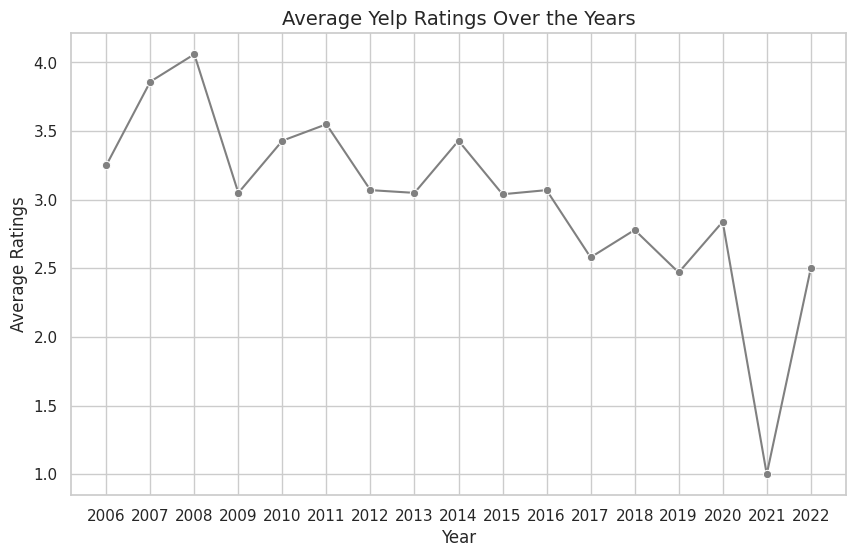

In [90]:
simple_df2 = spark.sql("select substring(yelping_since from 1 for 4) as yelping_since_year, round(sum(average_stars)/count(average_stars),2) as average_ratings from academic_dataset_user_selected_category group by yelping_since_year order by yelping_since_year").toPandas()
plt.figure(figsize=(10, 6))
sns.lineplot(x='yelping_since_year', y='average_ratings', data=simple_df2, marker='o', color='grey')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Ratings', fontsize=12)
plt.title('Average Yelp Ratings Over the Years', fontsize=14)
plt.show()

In [17]:
spark.sql("select user_id, name, sum(review_count) as total_reviews, sum(fans) as total_fans from academic_dataset_user_selected_category group by user_id, name order by total_reviews desc limit 15").show(truncate = False)

+----------------------+--------+-------------+----------+
|user_id               |name    |total_reviews|total_fans|
+----------------------+--------+-------------+----------+
|9Y1YkloHk2MAE3hkwYdFKA|Gene    |2536         |188       |
|R7NM7vIyUfSTXvMsw7jNTA|Marshall|1680         |56        |
|mJy-5ShuwwYRayxRtl6xxA|Lauren  |1628         |92        |
|cjLp1QarHZb_SCf6xJmIWQ|Holly   |1270         |136       |
|6ObFF8-uKnOAlXuSH4TlyQ|Isabella|1245         |824       |
|lGpMQT0jgCLRNHBTSAL-IA|Stephen |996          |56        |
|S5r0Rod3JrLSRBDDTLiCfg|John    |960          |12        |
|KWLxxZKAcdUOBqBLMPW22w|Nancy   |944          |68        |
|L2U4I05dvNsgCpm0NIxkJA|Zachary |892          |52        |
|kA6H0FTukkmTXv5H3S9XCg|Monique |856          |26        |
|0yrF14nWVAFeI0fG29a63g|Betsy   |851          |54        |
|HB52HJAcW7zCcLRw2Oq8tw|James   |810          |18        |
|xWmYN57XXZbg0LOK8WbbFQ|John    |794          |74        |
|d6zIVWiJyPB6PZuAxVexwg|Robert  |787          |46       

In [18]:
academic_dataset_elite  = academic_dataset_user_selected_category.select(["user_id", "elite"])

In [19]:
from collections import defaultdict
elite_years_user_ids = defaultdict(list)
for row in academic_dataset_elite.toPandas().iterrows():
    if row[1]["elite"]:
        years = row[1]["elite"].split(",")
        for year in years:
            elite_years_user_ids[year].append(row[1]["user_id"])

In [20]:
import pandas as pd
elite_users_years_df = pd.DataFrame()
elite_users_years_df["year"] = list(elite_years_user_ids.keys())
elite_users_years_df["elite_users_count"] = list(map(len, elite_years_user_ids.values()))

In [105]:
elite_users_years_df.loc[elite_users_years_df['year'] == '20', 'year'] = '2020'
elite_users_years_df['year'] = elite_users_years_df['year'].astype(int)
elite_users_years_df.sort_values(by='year', ascending=True, inplace=True)
elite_users_years_df

,year,elite_users_count
12,2007,1
13,2008,1
14,2009,1
0,2010,4
1,2011,10
2,2012,21
3,2013,18
4,2014,14
5,2015,23
6,2016,30


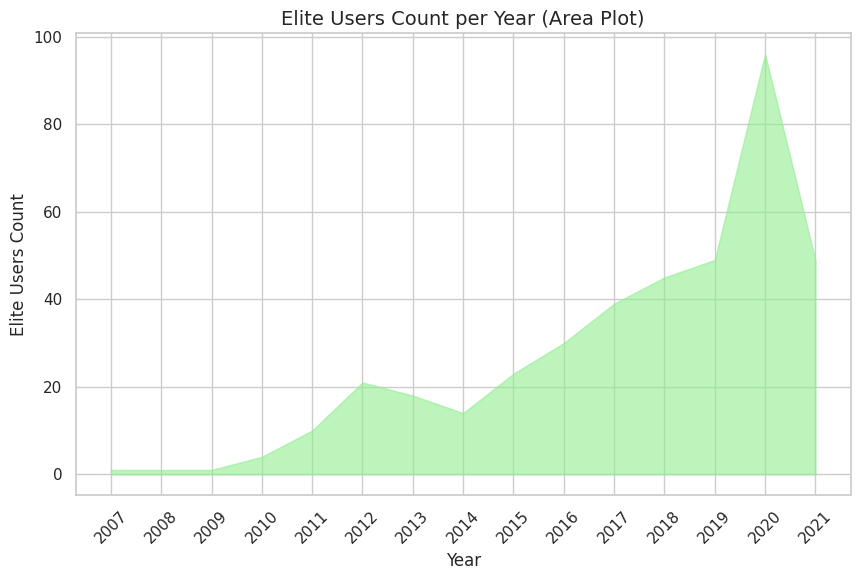

In [106]:
plt.figure(figsize=(10, 6))
plt.fill_between(elite_users_years_df['year'], elite_users_years_df['elite_users_count'], color='lightgreen', alpha=0.6)
plt.title('Elite Users Count per Year (Area Plot)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Elite Users Count', fontsize=12)
plt.xticks(elite_users_years_df['year'], rotation=45)
plt.show()

#### Complex Queries

In [22]:
from pyspark.sql.functions import col
academic_dataset_business_reviews = academic_dataset_az.alias("business").join(academic_dataset_review_parquet.alias("review"), academic_dataset_review_parquet.business_id == academic_dataset_az.business_id, "inner").select(
        col("business.address"),
        col("business.name"),
        col("business.business_id"),
        col("business.categories"),
        col("business.city"),
        col("business.stars"),
        col("business.state"),
        col("business.hours"),
        col("business.attributes"),
        col("business.review_count"),
        col("review.review_id"),
        col("review.text"),
        col("review.funny"),
        col("review.cool"),
        col("review.useful"),
        col("review.user_id"),
        col("review.date")
)

In [23]:
academic_dataset_business_reviews.show()

+--------------------+--------------------+--------------------+--------------------+------+-----+-----+--------------------+----------+------------+--------------------+--------------------+-----+----+------+--------------------+-------------------+
|             address|                name|         business_id|          categories|  city|stars|state|               hours|attributes|review_count|           review_id|                text|funny|cool|useful|             user_id|               date|
+--------------------+--------------------+--------------------+--------------------+------+-----+-----+--------------------+----------+------------+--------------------+--------------------+-----+----+------+--------------------+-------------------+
|      6161 E 22nd St|          Chase Bank|slarU7pbjcoYz29-S...|Banks & Credit Un...|Tucson|  2.0|   AZ|{9:0-17:0, 9:0-17...|      null|           5|Zvfz9CeorbvKBa2zR...|I have been at th...|    0|   0|     0|JKt7HXaEpXeTOWbFW...|2017-11-17 00:59:

In [24]:
from pyspark.sql.functions import col
academic_dataset_business_users_reviews = academic_dataset_user.alias("user").join(academic_dataset_business_reviews.alias("review"), academic_dataset_review_parquet.user_id == academic_dataset_user.user_id, "inner").select(
        col("review.review_id"),
        col("review.text"),
        col("review.funny"),
        col("review.cool"),
        col("review.business_id"),
        col("review.hours"),
        col("review.attributes"),
        col("review.useful"),
        col("review.stars"),
        col("review.user_id"),
        col("review.name").alias("business_name"),
        col("review.date"),
        col("user.name"),
        col("user.review_count"),
        col("user.yelping_since"),
        col("user.elite"),
        col("average_stars")
)

In [25]:
academic_dataset_business_users_reviews.show()

+--------------------+--------------------+-----+----+--------------------+--------------------+--------------------+------+-----+--------------------+--------------------+-------------------+---------+------------+-------------------+--------------------+-------------+
|           review_id|                text|funny|cool|         business_id|               hours|          attributes|useful|stars|             user_id|       business_name|               date|     name|review_count|      yelping_since|               elite|average_stars|
+--------------------+--------------------+-----+----+--------------------+--------------------+--------------------+------+-----+--------------------+--------------------+-------------------+---------+------------+-------------------+--------------------+-------------+
|3D4PyFeUXBP1nHFnp...|Can't say enough ...|    0|   0|U4unTh0GnXSUJ8zgZ...|{9:0-17:0, 9:0-17...|                null|     0|  3.5|gc-OrLW4TM4Km93Rt...|          Chase Bank|2020-09-21 05:2

In [26]:
academic_dataset_business_users_reviews.createOrReplaceTempView("academic_dataset_business_users_reviews")

In [29]:
reviews_users = spark.sql("select business_name, name, collect_list(text) as reviews_written from academic_dataset_business_users_reviews group by business_name, name")

In [30]:
reviews_users = reviews_users.toPandas()

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(reviews_list):
    final_positive_sentiments = 0
    for review in reviews_list:
        scores = analyzer.polarity_scores(review)
        if scores['compound'] > 0.05:
            final_positive_sentiments += 1
    return final_positive_sentiments
        


In [32]:
reviews_users["sentiment_analysis"] = reviews_users["reviews_written"].apply(get_sentiment)

In [33]:
reviews_users

,business_name,name,reviews_written,sentiment_analysis
0,BBVA Compass,Burma,"[In general, BBVA CompAss Bank is the most inc...",0
1,BBVA Compass,Dee,[Compass bank is the worst financial instituti...,1
2,BBVA Compass,K.,[I have found good banks with customer service...,1
3,BBVA Compass,Letty,[I used to love this bank. Their customer serv...,0
4,BBVA Compass,Maci,[More of a general review of the company. Cred...,1
...,...,...,...,...
309,Wells Fargo Bank,Timothy,[One watch-out regarding the much publicized G...,1
310,Wells Fargo Bank,Valentine,"[Im often visitor at this location. Love, love...",1
311,Wells Fargo Bank,Valerie,[Have been with Wells Fargo for over ten years...,0
312,Wells Fargo Bank,Veronica,[On June 28th my mother who is of Asian descen...,0


In [34]:
reviews_users = spark.createDataFrame(reviews_users)

In [35]:
reviews_users.createOrReplaceTempView("reviews_users")

In [36]:
spark.sql("select business_name, sum(sentiment_analysis) as total_positive_reviews from reviews_users group by business_name order by total_positive_reviews desc").show(truncate = False)

+--------------------------------+----------------------+
|business_name                   |total_positive_reviews|
+--------------------------------+----------------------+
|Chase Bank                      |41                    |
|Vantage West Credit Union       |39                    |
|Pima Federal Credit Union       |35                    |
|Bank of America Financial Center|26                    |
|Wells Fargo Bank                |24                    |
|OneAZ Credit Union              |11                    |
|Tucson Federal Credit Union     |11                    |
|Pyramid Federal Credit Union    |10                    |
|Hughes Federal Credit Union     |8                     |
|Bank of Tucson                  |7                     |
|Tucson Federal Creit Union      |5                     |
|BBVA Compass                    |4                     |
|Tucson Old Pueblo Credit Union  |3                     |
+--------------------------------+----------------------+



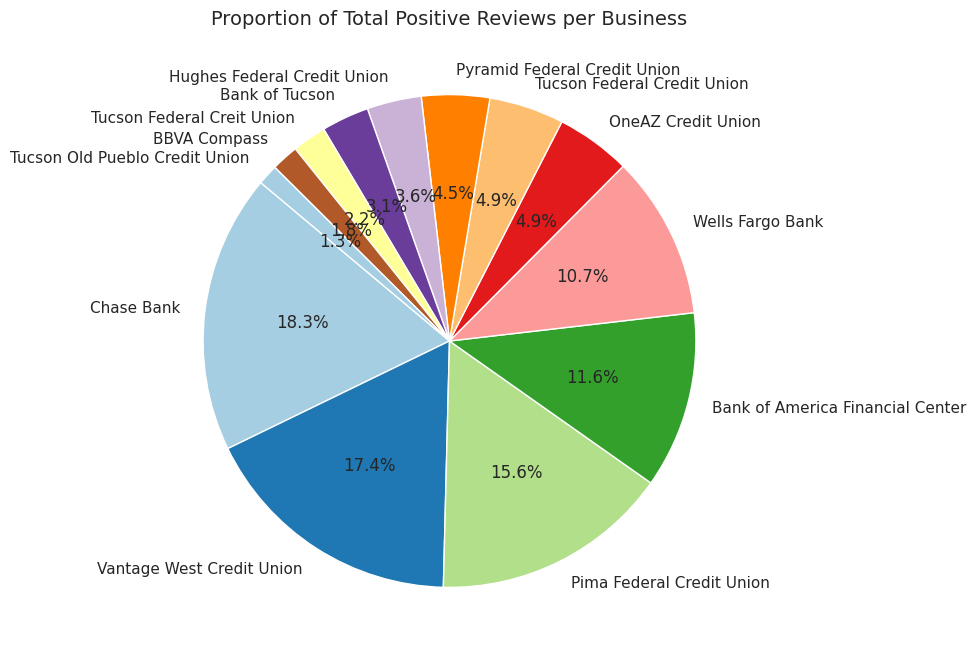

In [108]:
complex_df1 = spark.sql("select business_name, sum(sentiment_analysis) as total_positive_reviews from reviews_users group by business_name order by total_positive_reviews desc").toPandas()
plt.figure(figsize=(8, 8))
plt.pie(complex_df1['total_positive_reviews'], labels=complex_df1['business_name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Total Positive Reviews per Business', fontsize=14)
plt.show()

In [37]:
academic_dataset_business_hours = academic_dataset_business_users_reviews.select(["business_name","hours","stars","average_stars","review_count"]) .toPandas()

In [38]:
total_working_hours = []

def get_total_working_hours(row):
    total_hours = 0
    for day in row:
        if day:
            start,end = day.split(",")[0].split("-")
            start_total_minutes = int(start.split(":")[0]) * 60 + int(start.split(":")[1])
            end_total_minutes = int(end.split(":")[0]) * 60 + int(end.split(":")[1])
            total_hours += ((end_total_minutes - start_total_minutes)/ 60)
    return total_hours

    
for row in academic_dataset_business_hours.iterrows():
    if row[1]["hours"] is None:
        total_working_hours.append(0)
    else:
        wh_list = list(row[1]["hours"])
        total_working_hours.append(get_total_working_hours(wh_list))

In [39]:
academic_dataset_business_hours["total_working_hours"] = total_working_hours

In [40]:
academic_dataset_business_hours = spark.createDataFrame(academic_dataset_business_hours)

In [41]:
academic_dataset_business_hours.createOrReplaceTempView("academic_dataset_business_hours")

In [42]:
spark.sql("select business_name, total_working_hours, round(sum(average_stars)/count(average_stars),2) as average_ratings from academic_dataset_business_hours group by business_name, total_working_hours order by average_ratings desc").show()

+--------------------+-------------------+---------------+
|       business_name|total_working_hours|average_ratings|
+--------------------+-------------------+---------------+
|Pyramid Federal C...|               45.0|           3.84|
|    Wells Fargo Bank|               43.0|           3.79|
|          Chase Bank|               40.0|           3.68|
|        BBVA Compass|               41.0|           3.54|
|          Chase Bank|               44.0|           3.51|
|    Wells Fargo Bank|               35.5|           3.32|
|Pima Federal Cred...|               31.0|           3.27|
|Pyramid Federal C...|               41.0|           3.25|
|Bank of America F...|               33.0|            3.2|
|      Bank of Tucson|               35.0|           2.92|
|Tucson Federal Cr...|                0.0|           2.88|
|Hughes Federal Cr...|               33.0|           2.85|
|  OneAZ Credit Union|               33.0|           2.83|
|Bank of America F...|               24.0|            2.

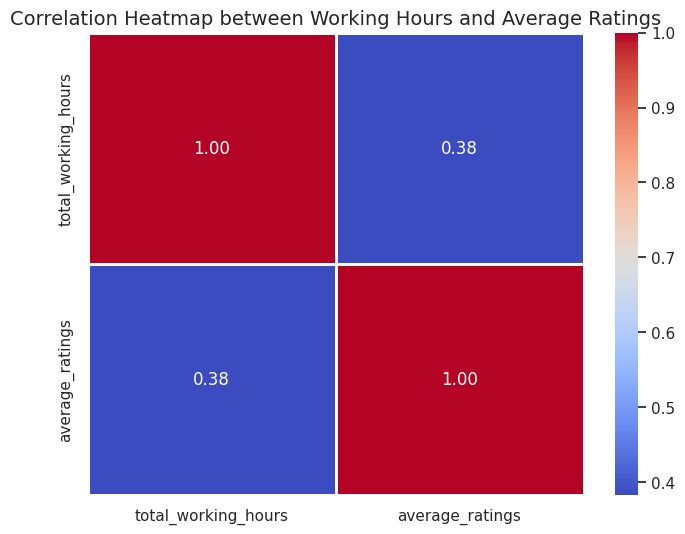

In [110]:
df = spark.sql("select business_name, total_working_hours, round(sum(average_stars)/count(average_stars),2) as average_ratings from academic_dataset_business_hours group by business_name, total_working_hours order by average_ratings desc").toPandas()
corr_matrix = df[['total_working_hours', 'average_ratings']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title('Correlation Heatmap between Working Hours and Average Ratings', fontsize=14)
plt.show()

In [43]:
academic_dataset_business_users_reviews_checkins = academic_dataset_business_users_reviews.alias("combined").join(academic_dataset_checkin.alias("checkin"), academic_dataset_business_users_reviews.business_id == academic_dataset_checkin.business_id, "inner").select(
    col("combined.review_id"),
    col("combined.text"),
    col("combined.funny"),
    col("combined.cool"),
    col("combined.business_id"),
    col("combined.hours"),
    col("combined.attributes"),
    col("combined.useful"),
    col("combined.stars"),
    col("combined.user_id"),
    col("combined.business_name"),
    col("combined.date"),
    col("combined.name"),
    col("combined.review_count"),
    col("combined.yelping_since"),
    col("combined.average_stars"),
    col("checkin.date").alias("checkin_date")

)

In [44]:
academic_dataset_business_users_reviews_checkins.show(truncate=False)

+----------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----+----------------------+-----------------------------------------------------------------------+----------+---

In [46]:
from pyspark.sql.functions import *
academic_dataset_business_users_reviews_checkins = academic_dataset_business_users_reviews_checkins.withColumn("total_checkins",size(split(academic_dataset_business_users_reviews_checkins.checkin_date,",")))

In [47]:
academic_dataset_business_users_reviews_checkins.show()

+--------------------+--------------------+-----+----+--------------------+--------------------+----------+------+-----+--------------------+--------------------+-------------------+--------+------------+-------------------+-------------+--------------------+--------------+
|           review_id|                text|funny|cool|         business_id|               hours|attributes|useful|stars|             user_id|       business_name|               date|    name|review_count|      yelping_since|average_stars|        checkin_date|total_checkins|
+--------------------+--------------------+-----+----+--------------------+--------------------+----------+------+-----+--------------------+--------------------+-------------------+--------+------------+-------------------+-------------+--------------------+--------------+
|8WPi_bSfcZG8ano5B...|On June 28th my m...|    0|   0|0Qqxm9SrGEi4qtfX0...|{9:30-16:0, 9:30-...|      null|     0|  2.5|tQA7EE3aB9bgDPpIf...|    Wells Fargo Bank|2021-06-29 02

In [48]:
academic_dataset_business_users_reviews_checkins.createOrReplaceTempView("academic_dataset_business_users_reviews_checkins")

In [49]:
spark.sql("select business_name, sum(total_checkins) as total_checkins, sum(review_count) as total_reviews, round(sum(average_stars)/count(average_stars),2) as average_ratings_by_users from academic_dataset_business_users_reviews_checkins group by business_name order by total_checkins desc").show(truncate=False) 

+--------------------------------+--------------+-------------+------------------------+
|business_name                   |total_checkins|total_reviews|average_ratings_by_users|
+--------------------------------+--------------+-------------+------------------------+
|Vantage West Credit Union       |5630          |4838         |2.78                    |
|Chase Bank                      |2481          |9747         |3.53                    |
|Bank of America Financial Center|1973          |6332         |2.89                    |
|Wells Fargo Bank                |1318          |2353         |3.4                     |
|Pima Federal Credit Union       |596           |3721         |3.27                    |
|Tucson Federal Credit Union     |220           |1551         |2.63                    |
|Pyramid Federal Credit Union    |125           |1144         |3.59                    |
|Tucson Old Pueblo Credit Union  |42            |591          |2.46                    |
|BBVA Compass        

In [58]:
academic_dataset_combined = academic_dataset_business_users_reviews_checkins.alias("combined").join(academic_dataset_tip.alias("tip"), academic_dataset_business_users_reviews_checkins.user_id == academic_dataset_tip.user_id, "inner").select(
    col("combined.review_id"),
    col("combined.text"),
    col("combined.funny"),
    col("combined.cool"),
    col("combined.business_id"),
    col("combined.hours"),
    col("combined.attributes"),
    col("combined.useful"),
    col("combined.stars"),
    col("combined.user_id"),
    col("combined.business_name"),
    col("combined.date"),
    col("combined.name"),
    col("combined.review_count"),
    col("combined.yelping_since"),
    col("combined.average_stars"),
    col("combined.total_checkins"),
    col("combined.date").alias("checkin_date"),
    col("tip.text").alias("tip_text"),
    col("tip.compliment_count")
)

In [59]:
academic_dataset_combined.show()

+--------------------+--------------------+-----+----+--------------------+--------------------+----------+------+-----+--------------------+--------------------+-------------------+--------+------------+-------------------+-------------+--------------+-------------------+--------------------+----------------+
|           review_id|                text|funny|cool|         business_id|               hours|attributes|useful|stars|             user_id|       business_name|               date|    name|review_count|      yelping_since|average_stars|total_checkins|       checkin_date|            tip_text|compliment_count|
+--------------------+--------------------+-----+----+--------------------+--------------------+----------+------+-----+--------------------+--------------------+-------------------+--------+------------+-------------------+-------------+--------------+-------------------+--------------------+----------------+
|x4-ICIF4sHu7UvBsn...|Joni is very very...|    0|   0|2gvTPJ1xA_

In [60]:
academic_dataset_combined.createOrReplaceTempView("academic_dataset_combined")

In [68]:
spark.sql("select business_name, round(sum(stars)/count(stars),2) as ratings, sum(compliment_count) as total_compliments_recieved_for_tips from academic_dataset_combined group by business_name order by total_compliments_recieved_for_tips desc").show()

+--------------------+-------+-----------------------------------+
|       business_name|ratings|total_compliments_recieved_for_tips|
+--------------------+-------+-----------------------------------+
|Vantage West Cred...|   1.98|                                 28|
|          Chase Bank|   2.91|                                 18|
|Pima Federal Cred...|   2.59|                                 14|
|Bank of America F...|   1.79|                                 14|
|    Wells Fargo Bank|   2.52|                                 10|
|Tucson Federal Cr...|   1.48|                                  2|
|Tucson Old Pueblo...|    3.0|                                  2|
|      Bank of Tucson|    2.5|                                  1|
|Pyramid Federal C...|   4.45|                                  1|
|Hughes Federal Cr...|    1.5|                                  0|
|        BBVA Compass|    2.5|                                  0|
|Tucson Federal Cr...|    2.0|                                

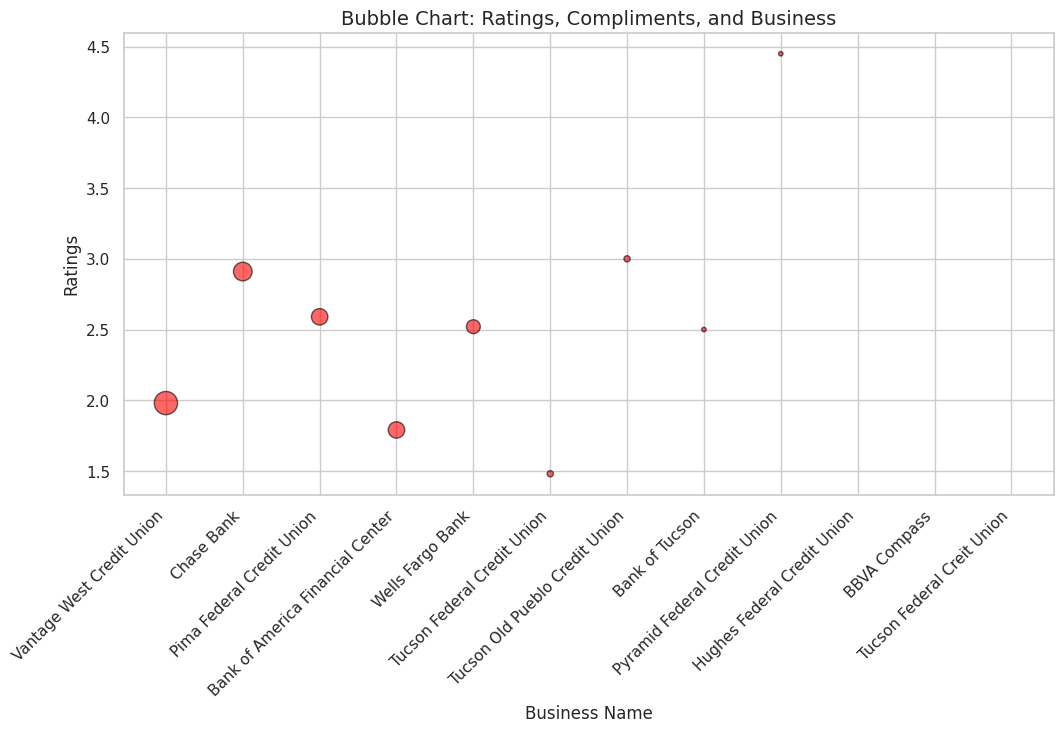

In [114]:
df = spark.sql("select business_name, round(sum(stars)/count(stars),2) as ratings, sum(compliment_count) as total_compliments_recieved_for_tips from academic_dataset_combined group by business_name order by total_compliments_recieved_for_tips desc").toPandas()
plt.figure(figsize=(12, 6))
plt.scatter(df['business_name'], df['ratings'], 
            s=df['total_compliments_recieved_for_tips']*10, color='red', alpha=0.6, edgecolor='black')
plt.title('Bubble Chart: Ratings, Compliments, and Business', fontsize=14)
plt.xlabel('Business Name', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()


In [74]:
from pyspark.sql.types import IntegerType

def get_sentiment(review):
    positive_sentiment = 0
    scores = analyzer.polarity_scores(review)
    if scores['compound'] > 0.05:
        positive_sentiment = 1
    return positive_sentiment

get_sentiment_udf = udf(get_sentiment, IntegerType())


academic_dataset_combined = academic_dataset_combined.withColumn("positive_review",get_sentiment_udf(academic_dataset_combined["text"]))
academic_dataset_combined = academic_dataset_combined.withColumn("positive_tip",get_sentiment_udf(academic_dataset_combined["tip_text"]))

In [75]:
academic_dataset_combined.createOrReplaceTempView("academic_dataset_combined")

In [78]:
spark.sql("select business_name, sum(total_checkins) as total_checkins, sum(positive_review) as total_positive_reviews from academic_dataset_combined group by business_name order by total_checkins desc").show()

+--------------------+--------------+----------------------+
|       business_name|total_checkins|total_positive_reviews|
+--------------------+--------------+----------------------+
|          Chase Bank|        149628|                  2888|
|    Wells Fargo Bank|         31800|                   505|
|Bank of America F...|         25654|                   502|
|Vantage West Cred...|         21830|                   589|
|Pima Federal Cred...|         11070|                   639|
|Tucson Federal Cr...|          1724|                   128|
|Pyramid Federal C...|          1253|                    85|
|Tucson Old Pueblo...|           210|                    21|
|        BBVA Compass|            80|                    14|
|      Bank of Tucson|            33|                     7|
|Tucson Federal Cr...|            10|                     5|
|Hughes Federal Cr...|             4|                     1|
+--------------------+--------------+----------------------+



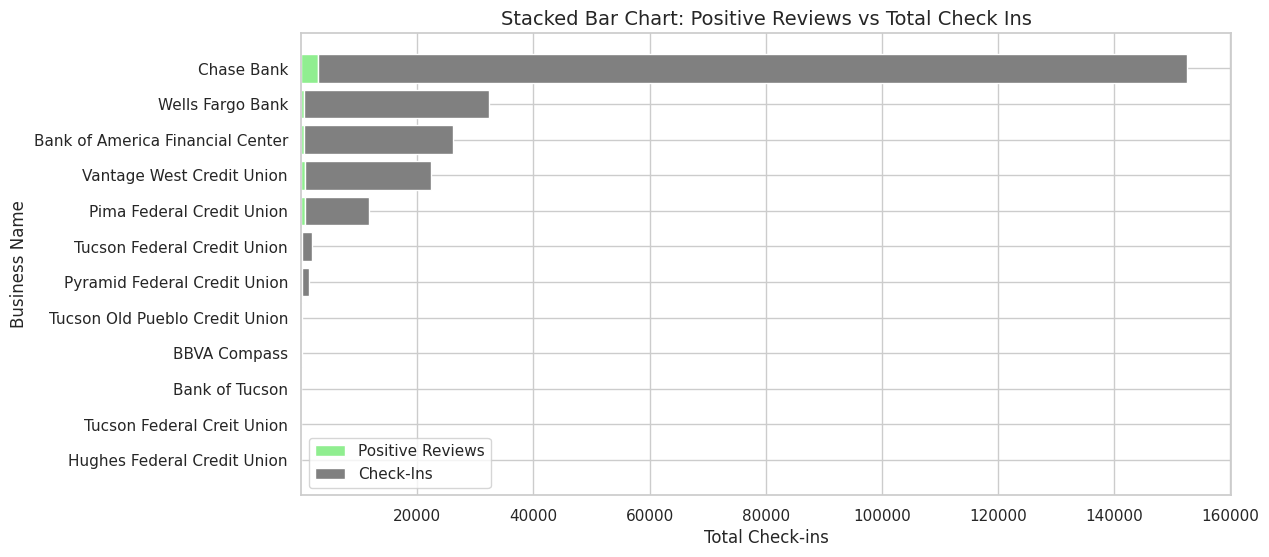

In [116]:
df = spark.sql("select business_name, sum(total_checkins) as total_checkins, sum(positive_review) as total_positive_reviews from academic_dataset_combined group by business_name order by total_checkins desc").toPandas()

plt.figure(figsize=(12, 6))
plt.barh(df['business_name'], df['total_positive_reviews'], color='lightgreen', label='Positive Reviews')
plt.barh(df['business_name'], df['total_checkins'], left=df['total_positive_reviews'], color='gray', label='Check-Ins')
plt.title('Stacked Bar Chart: Positive Reviews vs Total Check Ins', fontsize=14)
plt.xlabel('Total Check-ins', fontsize=12)
plt.ylabel('Business Name', fontsize=12)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


In [80]:
spark.sql("select user_id, name, round(sum(average_stars)/count(average_stars),2) as ratings, sum(positive_tip) as total_positve_tips from academic_dataset_combined group by user_id, name order by total_positve_tips desc limit 15").show()

+--------------------+--------+-------+------------------+
|             user_id|    name|ratings|total_positve_tips|
+--------------------+--------+-------+------------------+
|xWmYN57XXZbg0LOK8...|    John|   4.28|               882|
|mJy-5ShuwwYRayxRt...|  Lauren|   3.37|               380|
|pV-zk27LoaY3sQiSr...|Dr Tim L|   3.37|               281|
|KWLxxZKAcdUOBqBLM...|   Nancy|   4.19|               280|
|6ObFF8-uKnOAlXuSH...|Isabella|   4.33|               217|
|9Y1YkloHk2MAE3hkw...|    Gene|   3.65|               132|
|pYXeL0RCqus2Ifhth...|   Debbi|   4.26|                99|
|SYZVCsBMVHmhGRcdv...|   Wyatt|   4.63|                76|
|cZqR6gefC4HFYCrTZ...|  Ivette|   3.76|                65|
|3WpjM_PfFAy0PGL6B...| MaryAnn|   4.13|                63|
|fdFgZQQYQJeEAshH4...|    Brad|   4.02|                61|
|AEKBfKt2niNzbCFFk...|   Chuck|   3.91|                59|
|Anx6fA6jHXmLS7oaU...|     Wes|   3.67|                52|
|hDRGivuKGsWEMSLvA...| Richard|   3.99|                3

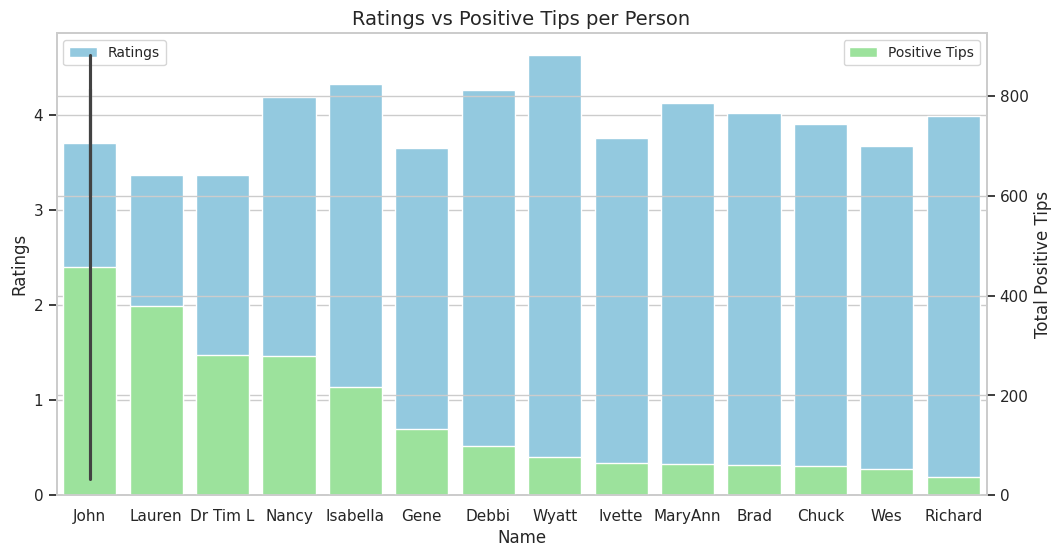

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Ratings (left y-axis)
sns.barplot(x='name', y='ratings', data=df, color='skyblue', ax=ax1, label='Ratings')
ax1.set_ylabel('Ratings', fontsize=12)
ax1.set_xlabel('Name', fontsize=12)
# ax1.set_xticklabels(df['name'], rotation=90, ha='right')

# Create a second y-axis for Total Positive Tips (right y-axis)
ax2 = ax1.twinx()
sns.barplot(x='name', y='total_positve_tips', data=df, color='lightgreen', ax=ax2, label='Positive Tips')
ax2.set_ylabel('Total Positive Tips', fontsize=12)

plt.title('Ratings vs Positive Tips per Person', fontsize=14)
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)
plt.show()
